In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [16]:
# Fashion MNIST veri kümesini yükleme
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Verileri [0, 1] aralığında ölçekleme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Veri şekillerini yeniden düzenleme
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Görüntüleri ve etiketleri normalize etme (bu kısımda y_train ve y_test'in normalize edilmesine gerek yok)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Veri şekillerini yeniden düzenleme
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


In [32]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0919 - accuracy: 0.9656 - val_loss: 0.2947 - val_accuracy: 0.9168
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0802 - accuracy: 0.9695 - val_loss: 0.3284 - val_accuracy: 0.9090
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0731 - accuracy: 0.9725 - val_loss: 0.3737 - val_accuracy: 0.9020
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0633 - accuracy: 0.9764 - val_loss: 0.3729 - val_accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0567 - accuracy: 0.9786 - val_loss: 0.4321 - val_accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0521 - accuracy: 0.9804 - val_loss: 0.4185 - val_accuracy: 0.9050
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0455 - accuracy: 0.9834 - val_loss: 0.4513 -

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 3s - loss: 0.5235 - accuracy: 0.9128 - 3s/epoch - 8ms/step

Test accuracy: 0.9128000140190125


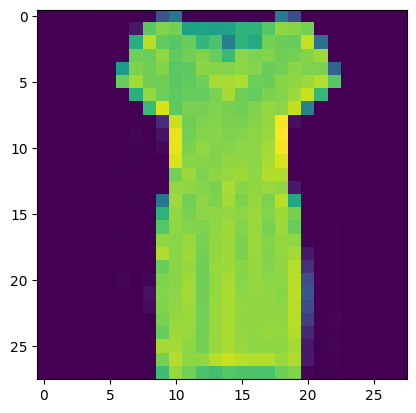

In [33]:
image = x_train[20, :].reshape((28, 28))
plt.imshow(image)
plt.show()